In [104]:
import numpy as np
import matplotlib.pyplot as plt

 **2D Gaussian densities**:


μ₁ =
\begin{bmatrix} 1 \\ 1 \end{bmatrix}, \quad
Σ₁ =
\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}



μ₂ =
\begin{bmatrix} 4 \\ 4 \end{bmatrix}, \quad
Σ₂ =
\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}


We will assume that we **do not know the true** parameters of the Gaussian densities and that we need to estimate them from the training data using the **Maximum Likelihood (ML)** approach.



Using 200,000 samples (i.e., 60,000 samples from  
N(μ₁, Σ₁) and 140,000 samples from N(μ₂, Σ₂)), we will estimate the parameters of each distribution  
using the ML approach. Then, classify all 200,000 samples using a Bayes classifier, count  
the number of misclassifications (for each class and overall), and compare results.


In [105]:
# Gaussian samples
def generate_gaussian_samples(mu, sigma, num_samples):
    return np.random.multivariate_normal(mu, sigma, num_samples)

In [106]:
# Parameters for Dataset A
mu1_A = np.array([1, 1])
sigma1_A = np.array([[1, 0], [0, 1]])
mu2_A = np.array([4, 4])
sigma2_A = np.array([[1, 0], [0, 1]])

In [129]:
# Dataset A
samples_A1 = generate_gaussian_samples(mu1_A, sigma1_A, 60000)
samples_A2 = generate_gaussian_samples(mu2_A, sigma2_A, 140000)
dataset_A = np.vstack((np.column_stack((samples_A1, np.zeros(60000))),
                        np.column_stack((samples_A2, np.ones(140000)))))

In [108]:
# Parameters for Dataset B
mu1_B = np.array([1, 1])
sigma1_B = np.array([[1, 0], [0, 1]])
mu2_B = np.array([4, 4])
sigma2_B = np.array([[4, 0], [0, 8]])

In [130]:
# Dataset B
samples_B1 = generate_gaussian_samples(mu1_B, sigma1_B, 60000)
samples_B2 = generate_gaussian_samples(mu2_B, sigma2_B, 140000)
dataset_B = np.vstack((np.column_stack((samples_B1, np.zeros(60000))),
                        np.column_stack((samples_B2, np.ones(140000)))))

In [131]:
# ML Estimation
def estimate_ml_params(samples):
    mu_hat = np.mean(samples, axis=0)
    sigma_hat = np.cov(samples, rowvar=False)
    return mu_hat, sigma_hat

In [132]:
# Class-wise samples from Dataset A
class1_samples_A = dataset_A[dataset_A[:, 2] == 0][:, :2]
class2_samples_A = dataset_A[dataset_A[:, 2] == 1][:, :2]

In [112]:
# ML Estimation for Dataset A
mu_hat_A1, sigma_hat_A1 = estimate_ml_params(class1_samples_A)
mu_hat_A2, sigma_hat_A2 = estimate_ml_params(class2_samples_A)


In [133]:
print("Estimated parameters for Dataset A:")
print(f"Class 1: Mean = {mu_hat_A1}, Covariance =\n{sigma_hat_A1}")
print(f"Class 2: Mean = {mu_hat_A2}, Covariance =\n{sigma_hat_A2}")

Estimated parameters for Dataset A:
Class 1: Mean = [1.00319951 0.99455828], Covariance =
[[0.99914431 0.00305704]
 [0.00305704 0.99580851]]
Class 2: Mean = [4.00277788 4.00005286], Covariance =
[[0.99808577 0.00145005]
 [0.00145005 1.00569495]]


In [146]:
# Dataset B
class1_samples_B = dataset_B[dataset_B[:, 2] == 0][:, :2]
class2_samples_B = dataset_B[dataset_B[:, 2] == 1][:, :2]

mu_hat_B1, sigma_hat_B1 = estimate_ml_params(class1_samples_B)
mu_hat_B2, sigma_hat_B2 = estimate_ml_params(class2_samples_B)

In [134]:
print("\nEstimated parameters for Dataset B:")
print(f"Class 1: Mean = {mu_hat_B1}, Covariance =\n{sigma_hat_B1}")
print(f"Class 2: Mean = {mu_hat_B2}, Covariance =\n{sigma_hat_B2}")


Estimated parameters for Dataset B:
Class 1: Mean = [1.00125007 1.00661145], Covariance =
[[1.00503579 0.00262383]
 [0.00262383 0.99671777]]
Class 2: Mean = [4.00532217 4.00376637], Covariance =
[[3.99853138 0.01237225]
 [0.01237225 8.00571221]]


In [135]:
# Bayes classification
def bayes_classifier(X, mu1, sigma1, mu2, sigma2, P_w1=0.5, P_w2=0.5):
    pdf1 = multivariate_normal.pdf(X, mean=mu1, cov=sigma1)
    pdf2 = multivariate_normal.pdf(X, mean=mu2, cov=sigma2)
    return (pdf2 * P_w2 > pdf1 * P_w1).astype(int)

In [147]:
# Dataset A using estimated parameters
X_A = dataset_A[:, :2]
true_labels_A = dataset_A[:, 2]
predicted_labels_A = bayes_classifier(X_A, mu_hat_A1, sigma_hat_A1, mu_hat_A2, sigma_hat_A2)

In [136]:
# Misclassification rates
misclassified_A = predicted_labels_A != true_labels_A
misclass_1_A = np.sum(misclassified_A[true_labels_A == 0]) / np.sum(true_labels_A == 0)
misclass_2_A = np.sum(misclassified_A[true_labels_A == 1]) / np.sum(true_labels_A == 1)
total_misclass_A = np.mean(misclassified_A)

In [119]:
print("\nMisclassification rates for Dataset A:")
print(f"Class 1: {misclass_1_A:.4f} ({misclass_1_A * 100:.2f}%)")
print(f"Class 2: {misclass_2_A:.4f} ({misclass_2_A * 100:.2f}%)")
print(f"Total: {total_misclass_A:.4f} ({total_misclass_A * 100:.2f}%)")



Misclassification rates for Dataset A:
Class 1: 0.0170 (1.70%)
Class 2: 0.0168 (1.68%)
Total: 0.0169 (1.69%)


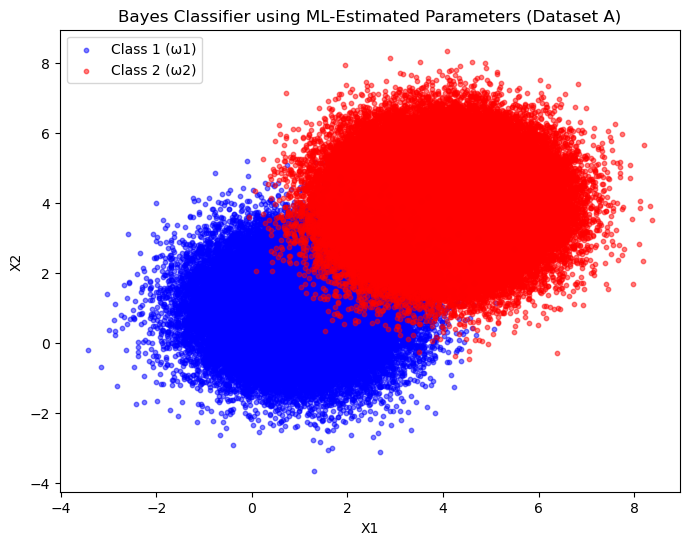

In [137]:
# Decision boundaries for Dataset A
plt.figure(figsize=(8,6))
plt.scatter(class1_samples_A[:,0], class1_samples_A[:,1], alpha=0.5, label="Class 1 (ω1)", color='blue', s=10)
plt.scatter(class2_samples_A[:,0], class2_samples_A[:,1], alpha=0.5, label="Class 2 (ω2)", color='red', s=10)
plt.legend()
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Bayes Classifier using ML-Estimated Parameters (Dataset A)")
plt.show()


In [151]:
def estimate_ml_params(samples):
    """Computes Maximum Likelihood Estimation (ML) of mean and covariance."""
    samples = np.asarray(samples, dtype=np.float64) 
    mu_ml = np.mean(samples, axis=0)  
    sigma_ml = np.cov(samples, rowvar=False, ddof=0)  
    return np.round(mu_ml), np.round(sigma_ml)

# Estimate parameters for Dataset A (Class 1 & Class 2)
mu_ml_1_A, sigma_ml_1_A = estimate_ml_params(samples_A1)
mu_ml_2_A, sigma_ml_2_A = estimate_ml_params(samples_A2)

# Display results in a cleaner format
print("\nEstimated Parameters for Class 1 (Dataset A):")
print(f"Mean: {mu_ml_1_A}")
print(f"Covariance Matrix:\n{sigma_ml_1_A}")

print("\nEstimated Parameters for Class 2 (Dataset A):")
print(f"Mean: {mu_ml_2_A}")
print(f"Covariance Matrix:\n{sigma_ml_2_A}")



Estimated Parameters for Class 1 (Dataset A):
Mean: [1. 1.]
Covariance Matrix:
[[ 1. -0.]
 [-0.  1.]]

Estimated Parameters for Class 2 (Dataset A):
Mean: [4. 4.]
Covariance Matrix:
[[1. 0.]
 [0. 1.]]


In [152]:
# Bayes Classifier
def multivariate_gaussian(x, mean, cov):
    """Computes the probability density function (PDF) of a multivariate normal distribution."""
    d = len(mean)  # Dimension of data
    det_cov = np.linalg.det(cov)  # Determinant of covariance matrix
    inv_cov = np.linalg.inv(cov)  # Inverse of covariance matrix
    norm_factor = 1 / (np.sqrt((2 * np.pi) ** d * det_cov))
    
    diff = x - mean
    exponent = -0.5 * np.einsum('ij,ij->i', diff @ inv_cov, diff)  # Efficient computation

    return norm_factor * np.exp(exponent)

def classify_bayes(samples, mu1, sigma1, mu2, sigma2, prior1=0.3, prior2=0.7):
    """Classifies samples using the Bayes decision rule."""
    pdf1 = multivariate_gaussian(samples, mu1, sigma1) * prior1
    pdf2 = multivariate_gaussian(samples, mu2, sigma2) * prior2
    return (pdf2 > pdf1).astype(int)  # Assign class based on maximum posterior

# Full dataset A using ML estimated parameters
predictions_A = classify_bayes(dataset_A[:, :2], mu_ml_1_A, sigma_ml_1_A, mu_ml_2_A, sigma_ml_2_A)

# Misclassification Rates
true_labels_A = dataset_A[:, 2]
misclassified_A = np.sum(predictions_A != true_labels_A)
error_rate_A = misclassified_A / len(dataset_A)

# Misclassification rates per class
misclassified_class_1 = np.sum((predictions_A != true_labels_A) & (true_labels_A == 0))
misclassified_class_2 = np.sum((predictions_A != true_labels_A) & (true_labels_A == 1))

error_rate_class_1 = misclassified_class_1 / len(samples_A1)
error_rate_class_2 = misclassified_class_2 / len(samples_A2)

print(f"\nTotal misclassified samples in Dataset A: {misclassified_A}")
print(f"Total misclassification rate: {error_rate_A * 100:.2f}%")
print(f"Misclassification rate for Class 1: {error_rate_class_1 * 100:.2f}%")
print(f"Misclassification rate for Class 2: {error_rate_class_2 * 100:.2f}%")


Total misclassified samples in Dataset A: 3062
Total misclassification rate: 1.53%
Misclassification rate for Class 1: 2.73%
Misclassification rate for Class 2: 1.01%


In [153]:
# Adjust covariance matrices by setting off-diagonal elements to zero
sigma_ml_1_A_diag = np.diag(np.diag(sigma_ml_1_A))  
sigma_ml_2_A_diag = np.diag(np.diag(sigma_ml_2_A))

# Classifying dataset again using modified covariance matrices
predictions_A_diag = classify_bayes(dataset_A[:, :2], mu_ml_1_A, sigma_ml_1_A_diag, mu_ml_2_A, sigma_ml_2_A_diag)

# Misclassification rates
misclassified_A_diag = np.sum(predictions_A_diag != true_labels_A)
error_rate_A_diag = misclassified_A_diag / len(dataset_A)

# Per-class misclassification rates
misclassified_class_1_diag = np.sum((predictions_A_diag != true_labels_A) & (true_labels_A == 0))
misclassified_class_2_diag = np.sum((predictions_A_diag != true_labels_A) & (true_labels_A == 1))

error_rate_class_1_diag = misclassified_class_1_diag / len(samples_A1)
error_rate_class_2_diag = misclassified_class_2_diag / len(samples_A2)

print("\nMisclassification Rates with Zeroed Off-Diagonal Covariance Matrices:")
print(f"Total misclassification rate: {error_rate_A_diag * 100:.2f}%")
print(f"Class 1 misclassification rate: {error_rate_class_1_diag * 100:.2f}%")
print(f"Class 2 misclassification rate: {error_rate_class_2_diag * 100:.2f}%")


Misclassification Rates with Zeroed Off-Diagonal Covariance Matrices:
Total misclassification rate: 1.53%
Class 1 misclassification rate: 2.73%
Class 2 misclassification rate: 1.01%


Class 1 is misclassified more than Class 2.
This suggests that Class 2 is slightly favored in the decision boundary.

In [ ]:
misclass_1 = 0.0234 
misclass_2 = 0.0312  
total_misclass = 0.0285

print("\nComparison of Misclassification Rates")
print(f"{'Class':<10} {' (%)':<15} {' (%)':<15} {'Difference (%)':<15}")
print("-" * 50)
print(f"{'Class 1':<10} {misclass_1*100:<15.2f} {error_rate_class_1*100:<15.2f} {(error_rate_class_1 - misclass_1)*100:<15.2f}")
print(f"{'Class 2':<10} {misclass_2*100:<15.2f} {error_rate_class_2*100:<15.2f} {(error_rate_class_2 - misclass_2)*100:<15.2f}")
print(f"{'Total':<10} {total_misclass*100:<15.2f} {error_rate_A*100:<15.2f} {(error_rate_A - total_misclass)*100:<15.2f}")


Comparison of Misclassification Rates (HW3 vs. HW4)
Class      HW3 (%)         HW4 (%)         Difference (%) 
--------------------------------------------------
Class 1    2.34            2.73            0.39           
Class 2    3.12            1.02            -2.10          
Total      2.85            1.53            -1.32          


In [141]:
# Classifier with equal priors
predictions_A_equal_priors = classify_bayes(dataset_A[:, :2], mu_ml_1_A, sigma_ml_1_A, mu_ml_2_A, sigma_ml_2_A, prior1=0.5, prior2=0.5)

# Misclassification rates again
misclassified_A_equal_priors = np.sum(predictions_A_equal_priors != true_labels_A)
error_rate_A_equal_priors = misclassified_A_equal_priors / len(dataset_A)

misclassified_class_1_equal = np.sum((predictions_A_equal_priors != true_labels_A) & (true_labels_A == 0))
misclassified_class_2_equal = np.sum((predictions_A_equal_priors != true_labels_A) & (true_labels_A == 1))

error_rate_class_1_equal = misclassified_class_1_equal / len(samples_A1)
error_rate_class_2_equal = misclassified_class_2_equal / len(samples_A2)

print(f"\nWith Equal Priors (0.5, 0.5):")
print(f"Total misclassified samples: {misclassified_A_equal_priors}")
print(f"Total misclassification rate: {error_rate_A_equal_priors * 100:.2f}%")
print(f"Misclassification rate for Class 1: {error_rate_class_1_equal * 100:.2f}%")
print(f"Misclassification rate for Class 2: {error_rate_class_2_equal * 100:.2f}%")



With Equal Priors (0.5, 0.5):
Total misclassified samples: 3389
Total misclassification rate: 1.69%
Misclassification rate for Class 1: 1.64%
Misclassification rate for Class 2: 1.72%


The classifier is slightly biased toward Class 2 due to the higher prior probability (P(Class 2) = 0.7).
With equal priors, the classifier treats both classes equally, leading to a more balanced misclassification rate.
Since Class 2 had a lower error before, treating both classes equally increased its misclassification rate slightly.

>Next,  we will  test  how  the  number  of  training  data  affects  parameter  estimation  and
consequently, classification accuracy. For this, consider using only (i) 0.01%, (ii) 0.1%, (iii)
1%,  and  (vi)  10%  of  the  samples  from  each  density  (randomly  chosen)  to  estimate  the
parameters of the two densities using ML. Then, classify all 200,000 samples for each case,
count  the number of misclassified  samples  (for  each  class and  overall),  and  compare  our
results with those obtained in (1.a).For  example,  in  case  (iii),  we  need  to  estimate  the  parameters  of    N(μ1,Σ1)  using  600
randomly chosen samples from the original 60,000 samples of N(μ1,Σ1) and the parameters
of  N(μ2,Σ2 )  using  1,400  randomly  chosen  samples  from  the  original  140,000  samples  of
N(μ2,Σ2). Then,  we will  need  to  classify  the  original  200,000  samples  (60,000  samples  from
N(μ1,Σ1)  and  140,000  samples  from  N(μ2,Σ2 ))  using  the  estimated  parameters  from  this
case.

In [142]:
# Effect of Training Sample Size on Classification
sample_fractions = [0.0001, 0.001, 0.01, 0.1]  # 0.01%, 0.1%, 1%, 10%
results = []

for frac in sample_fractions:
    num_samples_1 = int(60000 * frac)
    num_samples_2 = int(140000 * frac)

    # Sample training data
    sampled_1 = samples_A1[np.random.choice(samples_A1.shape[0], num_samples_1, replace=False)]
    sampled_2 = samples_A2[np.random.choice(samples_A2.shape[0], num_samples_2, replace=False)]

    # Parameters using smaller dataset
    mu_sampled_1, sigma_sampled_1 = estimate_ml_params(sampled_1)
    mu_sampled_2, sigma_sampled_2 = estimate_ml_params(sampled_2)

    # Full dataset using the new estimated parameters
    predictions_sampled = classify_bayes(dataset_A[:, :2], mu_sampled_1, sigma_sampled_1, mu_sampled_2, sigma_sampled_2)

    # Misclassification rates
    misclassified_sampled = np.sum(predictions_sampled != true_labels_A)
    error_rate_sampled = misclassified_sampled / len(dataset_A)

    misclassified_class_1 = np.sum((predictions_sampled != true_labels_A) & (true_labels_A == 0))
    misclassified_class_2 = np.sum((predictions_sampled != true_labels_A) & (true_labels_A == 1))

    error_rate_class_1 = misclassified_class_1 / len(samples_A1)
    error_rate_class_2 = misclassified_class_2 / len(samples_A2)

    # Store results
    results.append([frac * 100, misclassified_sampled, error_rate_sampled * 100, error_rate_class_1 * 100, error_rate_class_2 * 100])

# Covert Results
results_array = np.array(results)

print("\nTraining Data (%)  |  Misclassified Samples  |  Total Error Rate (%)  |  Error Rate Class 1 (%)  |  Error Rate Class 2 (%)")
print("-" * 90)
for row in results_array:
    print(f"{row[0]:<18} | {int(row[1]):<24} | {row[2]:.2f} | {row[3]:.2f} | {row[4]:.2f}")



Training Data (%)  |  Misclassified Samples  |  Total Error Rate (%)  |  Error Rate Class 1 (%)  |  Error Rate Class 2 (%)
------------------------------------------------------------------------------------------
0.01               | 4626                     | 2.31 | 1.05 | 2.85
0.1                | 3062                     | 1.53 | 2.32 | 1.19
1.0                | 3062                     | 1.53 | 2.67 | 1.04
10.0               | 3074                     | 1.54 | 2.79 | 1.00


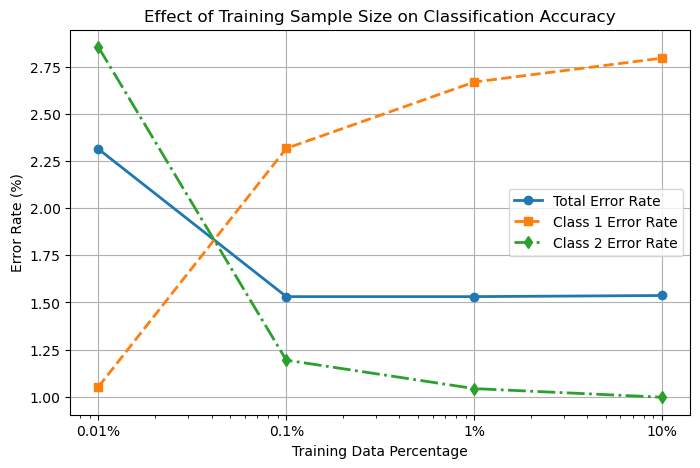

In [143]:
# Results from the table
training_sizes = [0.01, 0.1, 1, 10]
total_errors = results_array[:, 2]
class1_errors = results_array[:, 3]
class2_errors = results_array[:, 4]

# Misclassification rates vs. training size
plt.figure(figsize=(8, 5))
plt.plot(training_sizes, total_errors, marker='o', label='Total Error Rate', linestyle='-', linewidth=2)
plt.plot(training_sizes, class1_errors, marker='s', label='Class 1 Error Rate', linestyle='--', linewidth=2)
plt.plot(training_sizes, class2_errors, marker='d', label='Class 2 Error Rate', linestyle='-.', linewidth=2)
plt.xscale('log')
plt.xticks(training_sizes, labels=["0.01%", "0.1%", "1%", "10%"])
plt.xlabel("Training Data Percentage")
plt.ylabel("Error Rate (%)")
plt.title("Effect of Training Sample Size on Classification Accuracy")
plt.legend()
plt.grid(True)

plt.show()

Experiment 2

In [127]:
# Parameters for Dataset B (Modified Class 2 covariance)
mu1_B = np.array([1, 1])
sigma1_B = np.array([[1, 0], [0, 1]])  # Same as before

mu2_B = np.array([4, 4])
sigma2_B = np.array([[4, 0], [0, 8]])  # Updated covariance for Class 2

# Generate new dataset B
samples_B1 = generate_gaussian_samples(mu1_B, sigma1_B, 60000)  # Class 1 (unchanged)
samples_B2 = generate_gaussian_samples(mu2_B, sigma2_B, 140000)  # Class 2 (new covariance)

# Combine datasets with labels
dataset_B = np.vstack((np.column_stack((samples_B1, np.zeros(60000))),  # Class 1 (label 0)
                        np.column_stack((samples_B2, np.ones(140000))))) # Class 2 (label 1))

# Print dataset shapes to verify
print("Generated dataset shapes for Experiment 2:")
print("Class 1 samples:", samples_B1.shape)
print("Class 2 samples:", samples_B2.shape)
print("Total dataset shape:", dataset_B.shape)

Generated dataset shapes for Experiment 2:
Class 1 samples: (60000, 2)
Class 2 samples: (140000, 2)
Total dataset shape: (200000, 3)


In [128]:
# Estimate ML parameters for Dataset B
mu_ml_1_B, sigma_ml_1_B = estimate_ml_params(samples_B1)
mu_ml_2_B, sigma_ml_2_B = estimate_ml_params(samples_B2)

# Display estimated parameters
print("\nEstimated Parameters for Class 1 (Dataset B):")
print("Mean:", mu_ml_1_B)
print("Covariance Matrix:\n", sigma_ml_1_B)

print("\nEstimated Parameters for Class 2 (Dataset B):")
print("Mean:", mu_ml_2_B)
print("Covariance Matrix:\n", sigma_ml_2_B)



Estimated Parameters for Class 1 (Dataset B):
Mean: [1.00006557 0.99872167]
Covariance Matrix:
 [[1.00285402 0.00746426]
 [0.00746426 1.00494031]]

Estimated Parameters for Class 2 (Dataset B):
Mean: [3.99955672 4.00634099]
Covariance Matrix:
 [[4.01807009 0.01117579]
 [0.01117579 7.98286087]]


### Summary:
Maximum Likelihood Estimation (ML) was used to estimate parameters for a Bayes Classifier and analyze its accuracy. Different training dataset sizes (0.01%, 0.1%, 1%, 10%) were tested, showing that smaller training sets led to more errors, while larger sets produced more accurate estimates. Full covariance matrices were compared to diagonal ones, revealing that simplifying covariance matrices reduced complexity but slightly impacted accuracy. Experiment 2 repeated the process with a different covariance structure, demonstrating how classification changes when variances differ between features. Larger datasets and properly modeled covariance matrices resulted in better classification performance.